In [183]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [184]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [185]:
y.shape, tx.shape

((202,), (202, 2))

# Computing the Cost Function
Fill in the the `compute_cost` function below:

In [186]:
def compute_cost_mae(y, tx, w):
    # calculate the cost using MAE
    N = len(y)
    e = y - np.dot(tx,w)
    return sum([abs(e_n) for e_n in e])

def compute_cost(y, tx, w):
    # calculate the cost using MSE
    N = len(y)
    e = y - np.dot(tx,w)
    return (1.0/(2*N)) * np.dot(np.transpose(e), e)

    
w = np.array([1,2])
%timeit compute_cost(y, tx, w)

The slowest run took 5.82 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 56 µs per loop


# Grid Search

Fill in the function `grid_search()` below:

In [187]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    costs =  [[compute_cost(y, tx, (i,j)) for j in w1] for i in w0 ]     
    return np.array(costs)

Let us play with the grid search demo now!

Grid Search: loss*=1103.76935555309, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.170 seconds


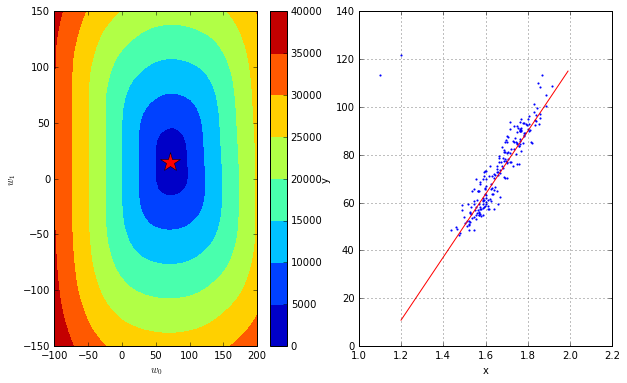

In [188]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

Using 2x intervals, results in a ~4x increase in execution time, and 4x intervals results in ~16x execution time. 

10: 0.815
20: 2.967
40: 11.975
...

This suggest a execution time complexity of O(n^2)

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [213]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    N = len(y)
    e = y - tx.dot(w)
    gradient = - 1.0/N * np.transpose(tx).dot(e)
    return gradient

def compute_subgradient(y, tx, w):
    """Compute the gradient."""
    N = len(y)
    e = y - tx.dot(w)
    gradient = - 1.0/N * np.transpose(tx).dot(e)
    print('@@@@@@@@:', gradient)
    return gradient

Please fill in the functions `gradient_descent` below:

In [214]:
def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # Compute gradient and loss
        gradient = compute_subgradient(y ,tx, w)
        loss = compute_cost(y, tx, w)
        
        # update w by gradient
        w = w - gamma * gradient
        
        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)
        # print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
        #      bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [215]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = .5

# Initialization
w_initial = np.array([-1000, 100])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

@@@@@@@@: [-1074.06780585    88.96510513]
@@@@@@@@: [-537.03390293   44.48255257]
@@@@@@@@: [-268.51695146   22.24127628]
@@@@@@@@: [-134.25847573   11.12063814]
@@@@@@@@: [-67.12923787   5.56031907]
@@@@@@@@: [-33.56461893   2.78015954]
@@@@@@@@: [-16.78230947   1.39007977]
@@@@@@@@: [-8.39115473  0.69503988]
@@@@@@@@: [-4.19557737  0.34751994]
@@@@@@@@: [-2.09778868  0.17375997]
@@@@@@@@: [-1.04889434  0.08687999]
@@@@@@@@: [-0.52444717  0.04343999]
@@@@@@@@: [-0.26222359  0.02172   ]
@@@@@@@@: [-0.13111179  0.01086   ]
@@@@@@@@: [-0.0655559  0.00543  ]
@@@@@@@@: [-0.03277795  0.002715  ]
@@@@@@@@: [-0.01638897  0.0013575 ]
@@@@@@@@: [-0.00819449  0.00067875]
@@@@@@@@: [-0.00409724  0.00033937]
@@@@@@@@: [-0.00204862  0.00016969]
@@@@@@@@: [ -1.02431088e-03   8.48437358e-05]
@@@@@@@@: [ -5.12155440e-04   4.24218679e-05]
@@@@@@@@: [ -2.56077720e-04   2.12109340e-05]
@@@@@@@@: [ -1.28038860e-04   1.06054670e-05]
@@@@@@@@: [ -6.40194300e-05   5.30273349e-06]
@@@@@@@@: [ -3.20097150e-05 

<function __main__.plot_figure>

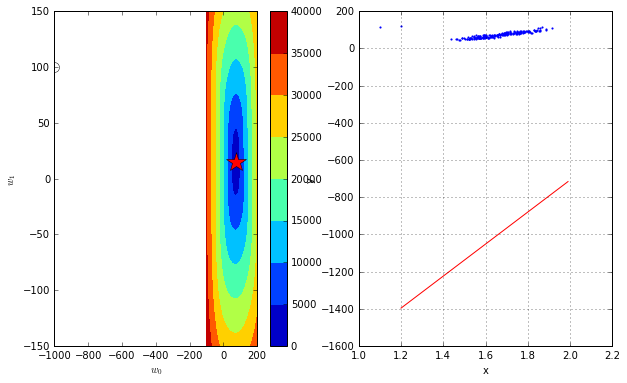

In [203]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# Stochastic gradient descent

In [204]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient for batch data."""
    N = len(y)
    gradient = 1.0/N * sum([np.dot((y[n] - np.dot(np.transpose(tx[n]), w)),-tx[n]) for n in range(0,N)])
    return gradient


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_epochs, gamma):
    """Stochastic gradient descent algorithm."""
    # Generate the batches
    batches = batch_iter(y, tx, batch_size)
    
    # Set the initial properties
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for i, batch in enumerate(batches):
        if i+1 == max_epochs:
            break
            
        # compute gradient and loss
        gradient = compute_stoch_gradient(y, tx, w)
        loss = compute_cost(y, tx, w)
        
        # Update w by gradient
        w = w - gamma * gradient
        
        # Store w and loss
        ws.append(w)
        losses.append(loss)
    return losses, ws

    

In [205]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = .4
batch_size = 10

# Initialization
w_initial = np.array([0.0, 0.0])

gradient_losses, gradient_ws = stochastic_gradient_descent(y, tx, w_initial, batch_size, max_iters, gamma)


<function __main__.plot_figure>

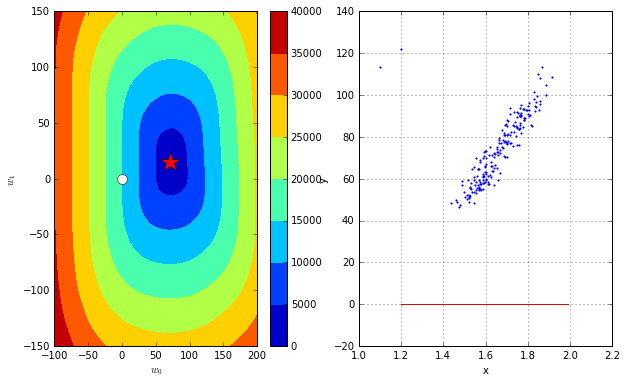

In [206]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)
interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))